# Homework 2

### CS328 — Numerical Methods for Visual Computing
- - -

**Out** on Monday 16.10, **due** on Monday 30.10.

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text. Please use the same format when submitting your answers. Begin your response to each problem with a <tt>&nbsp;<b>## Solution</b>&nbsp;&nbsp;</tt> markdown cell. Since this exercise includes a number of supplementary discussions, questions are explicitly marked with a **TODO** marker.

<br><div class="alert alert-warning">
Please keep in mind that homework assignments must be done individually.
</div>

## Problem -1: Warmup (not graded)

$$
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vc}{\mathbf{c}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\mA}{\mathbf{A}}
\newcommand{\mL}{\mathbf{L}}
\newcommand{\mU}{\mathbf{U}}
\newcommand{\mP}{\mathbf{P}}
\newcommand{\mI}{\mathbf{I}}
$$

The following Yes/No and paper & pencil questions are meant to check your comprehension of lecture and reading material in addition to linear algebra prerequisites.

1. Recall that a permutation matrix $\mP$ has exactly one entry with value $1$ in each row and column and zeros elsewhere. Prove that $\mP^{-1}=\mP^T$. You'll need the definitions of matrix multiplication and the matrix inverse, namely that $\mA\mA^{-1}=\mI$. (where $\mI$ is the identity matrix)<br><br>

2. Which of the following parametric models can be fit to data using linear regression techniques?
$$
\begin{align*}
   f_1(x, \vc) &= \vc_0 + \vc_1 x^2 + \vc_2 \sin(x) - \sqrt{\vc_3}\\
   f_2(x, \vc) &= \vc_0^3 x^3 - x\\
   f_3(x, \vc) &= \exp(\vc_0 x)\\
\end{align*}
$$
   here, $x$ represents the independent variable and $\vc$ is a vector containing the model parameters.<br><br>

3. A matrix $\mA\in\mathbb{R}^{n\times n}$ is said to be *symmetric and positive definite* (SPD) iff $\mA=\mA^T$ and $\vx^T\mA\vx>0$ for all $\vx\in\mathbb{R}^n$ with $\vx\ne \mathbf{0}$. It's useful to know whether matrices are SPD, since specialized storage representations (don't store entries below the diagonal) and factorization algorithms (Cholesky decomposition) can exploit these properties, reducing the expense of linear system solving by approximately 50%.

   Now recall the definition of the normal equations corresponding to the least squares system $\mA\vx\approx\vb$:
$$
\mA^T\mA\vx=\mA^T\vb.
$$
  Assuming that we'd like solve a least squares problem with this approach, it would naturally be useful to know whether the product matrix $\mA^T\mA$ is symmetric and positive definite so that these more efficient algorithms can be used. Can you prove that $\mA^T\mA$ is SPD? (you'll likely need to introduce some extra assumptions on $\mA$ for this)

## 0 Prelude

As in the last assignment we'll begin by importing essential NumPy/SciPy/Matplotlib components that are needed to complete the exercises. The first two lines instruct Matplotlib to embed figures directly into the notebook and render them in sufficient quality for modern high-DPI ("retina") displays.

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

You will get to run numerical algorithms on high resolution images in this homework, which will involve a fair amount of plotting and visualization of intermediate results. The Matplotlib default settings unfortunately cause figures to be shown at a tiny resolution, so this next line changes the settings to make all figures large by default. The second line ensures low resolution images are rendered with sharp pixel contours instead of a blurry approximation, which will be helpful later on.

In [29]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'

# Problem 1: Fitting a function to data, a.k.a. Regression Analysis (15 points)

The following plot visualizes the total population of the Canton Vaud over a period of 35 years from 1979 to 2014.

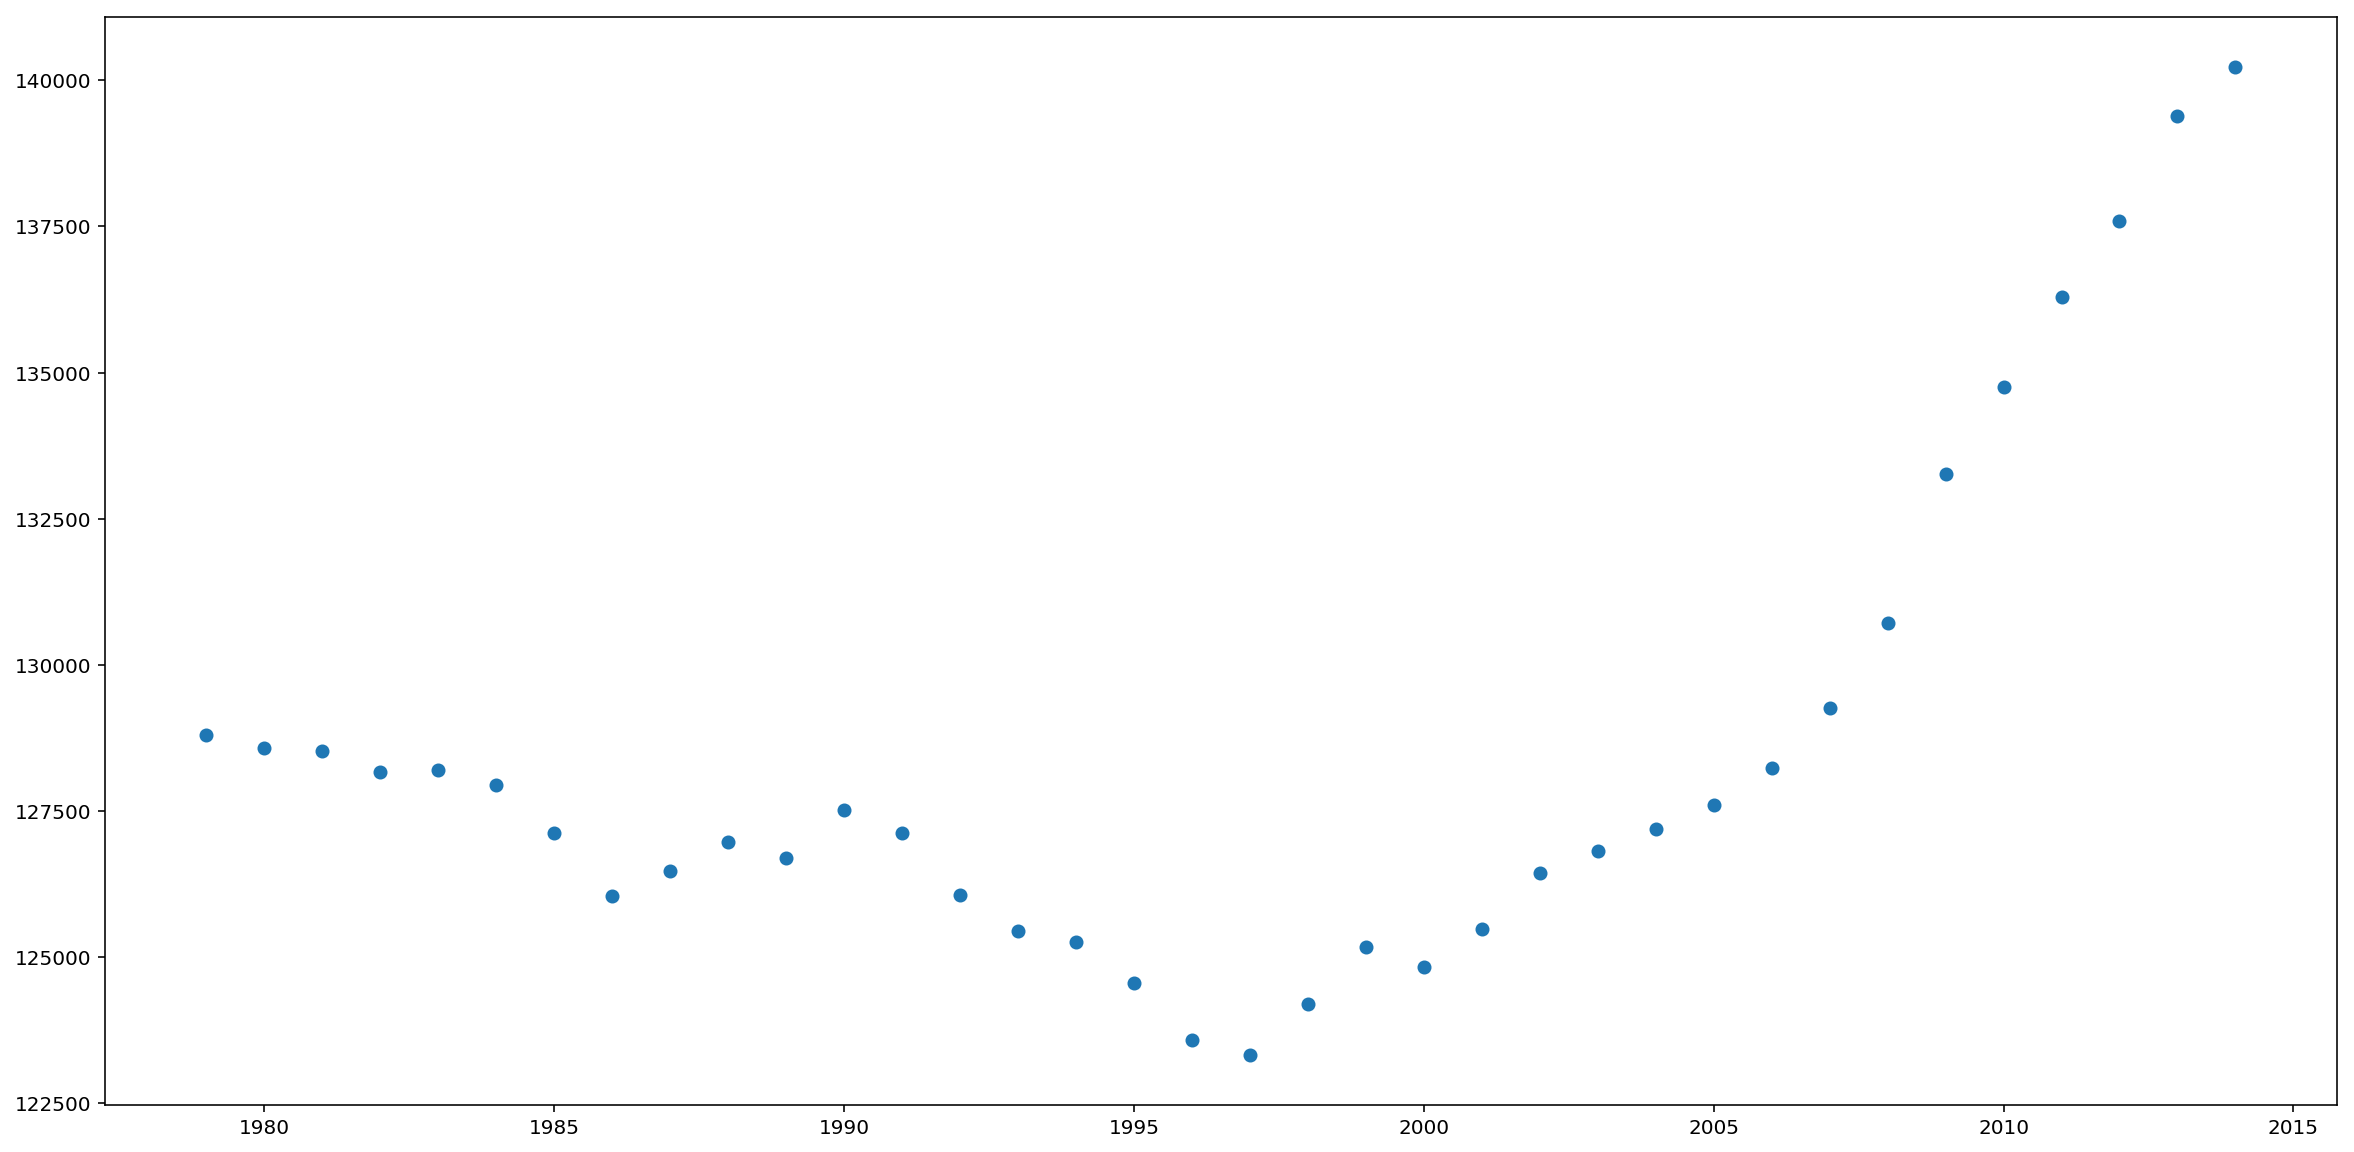

In [30]:
years = np.linspace(1979, 2014, 36)
population = np.array([128808, 128571, 128525, 128165, 128199, 127952, 127128, 126050, 126475, 126976, 
                       126699, 127515, 127118, 126058, 125457, 125264, 124561, 123577, 123325, 124205, 
                       125174, 124835, 125485, 126441, 126825, 127194, 127597, 128228, 129268, 130721, 
                       133265, 134753, 136288, 137586, 139390, 140228], dtype=np.float64)
plt.plot(years, population, 'o');

In this exercise, you will apply the tools of linear regression analysis and and linear least squares to fit an approximate parametric model to this dataset.

1. **TODO**: Solve a linear system via the LU factorization of the normal equations (via ``la.lu_factor()`` and ``la.lu_solve()`` similar to what was shown in class) to fit a degree-6 plynomial to this dataset, which maps from years to population values. Plot the original data, as well as your resulting polynomial (using a higher resolution with 300 evaluations between 1979 and 2014) in a figure below to compare the trend to the model.<br>Why are we using the normal equations here instead of directly applying the LU factorization?
<br>Assuming this very simple model is correct, how large would you predict the population of Vaud to be in the year 2020?<br><br>

2. **TODO**: Now create a similar figure where you fit again a degree-6 polynomial, but using the economy size QR factorization (and *without* the use of the normal equations). The functions to use are ``la.qr(matrix, mode='economic')`` and ``la.solve_triangular()``. Which of the methods (1. or 2.) produces the solution with a lower residual?<br><br>

3. **TODO**: What is the condition number of the product matrix $\mathbf{A}^T\mathbf{A}$ created by the normal equation approach in subproblem 1? (hint: use ``np.linalg.cond()``). Relate this information to your observations in subproblem 2.<br><br>

4. **TODO**: Use the same approch as in subproblem 1 (LU factorization), but this time without the normal equations (why?) to fit a degree-35 polynomial to the data. Does it result in a closer fit to the collected data? If so, explain why. Otherwise, what are the problems?

**Hint**:
A degree-n polynomial has the form $p(x) = \sum_{k=0}^{n} c_k x^k$ with the $n+1$ constants $c_0, \dots, c_n$.<br>

In [31]:
# Solution part 1


In [32]:
# Solution part 2


In [33]:
# Solution part 3


In [34]:
# Solution part 4


# 2 Developing a raw photograph (85 points)

Virtually any computer device in existence today is equipped with at least one digital camera; with over 5 billion users of digital photography, this technology has now fully permeated our society. In this exercise, you will get to build your own image processing pipeline that applies color space transformations to turn the raw data measured by a digital camera into a usable image that can be viewed on a computer screen. In the following, we will explain what this means, and how to implement the associated steps using tools from numerical linear algebra. But first, we shall begin with a brief review of the process that takes place when taking a picture.

A digital camera uses an assembly of optical elements to focus the incident light onto a silicon sensor that consists of millions of tiny regions arranged in a regular grid.  The silicon is sensitive to light, and each small region on the sensor (generally referred to as a *pixel*) measures the portion of light that falls on it. 
<img width="400" src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/20/ccdcamera.png">
When no picture is being taken, the sensor is either inactive or used for a live preview (as in mobile phones or smaller cameras). When the actual photograph is taken, it is important to be able to control the precise amount of time during which  light is collected by the sensor. This is realized by means of the *shutter*, a small mechanical or electronic barrier that prevents light from reaching the sensor. The shutter can open and close very quickly, in about 1/4000th of a second.

When taking a picture, the camera performs a sequence of steps in rapid succession: first, the shutter opens, allowing light to reach the pixels on the sensor. For a brief duration (known as the *exposure time*), the sensor collects all light that reaches the surface.  To be able to distinguish colors, each pixel on the sensor is covered with a tiny filter that will only permit certain wavelengths of light to pass through.
<img width="400" src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/20/photon_rain.png">
Due its physical nature, light reaches the sensor in discrete amounts not unlike droplets of rain that fill a number of buckets with water. When the exposure time is very short, each pixel may only have received a few droplets, and the image is very noisy. When the exposure time is too long, the buckets will fill up completely, and it is impossible to recover a usable image. Once the exposure time has elapsed, the shutter closes so that the measurement ceases to change any further.

Once the measurement is frozen, the camera proceeds to perform a full readout of the data associated with each pixel (i.e. the "fill height" of each bucket in the illustration above). This data is known as a *raw image*: a representation of the original sensor data without any additional processing. Raw images play a similar role as negatives in traditional photography: they contain all of the information that is needed to eventually create an image, but they aren't yet usable as an image on their own. Converting a raw image into an actual image entails decoding the information on the sensor and translating this data into displayable red/green/blue intensities that "make sense" on a computer screen, and which reproduce the colors that a human would have observed in the moment when the photo was taken.

Analogous to classical photography, the process of turning the raw sensor data into a usable image is referred to as "developing" the image. Cell phone cameras generally perform this step automatically without user intervention. On the other hand, most professional cameras allow the user to choose between developing the image automatically within the camera or storing undeveloped raw images that can be manually developed by the user later on. The latter has become extremely popular, since raw image contain more information than would be available in a fully processed image (such as a JPEG image). For instance, JPEG files may not be able to represent the full range of colors perceived by the camera's sensor, and the lossy compression implies that there is some loss of image quality. A range of commercial (Adobe Photoshop, Lightroom, ..) and free (RawTherapee, darktable, ..) software tools can be used to develop raw image with full artistic control over the output.

Developing an image can be an arbitrarily complex process, though the simplest version can be reduced to only four steps:

1. Loading the raw image data
2. Demosaicing
3. Color space transformation
4. Gamma correction

We will now walk through each of these steps (slightly out of order):

## 2.1 Loading the raw image data

Begin by downloading the following file (~72 megabytes), which contains the raw sensor data of two photographs taken with a [Canon 6D](https://en.wikipedia.org/wiki/Canon_EOS_6D) camera: <a href="http://rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/20/lacleman_raw.npz"><tt>http://rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/20/lacleman_raw.npz</tt></a>.

Place the file into the same directory as the <tt>CS328 - Homework 2.ipynb</tt> file so that it is easy to load from Python. The following set of commands then import the file and extract all relevant data (this will take a few seconds):

In [35]:
data = np.load("lacleman_raw.npz")
tree = data['tree']
whitebal = data['whitebal']
patches_target = data['patches_target']

The file contains three 2D NumPy arrays—two high resolution photographs (``tree`` and ``whitebal``) with approximately 20 million pixels each, and a mysterious small array (``patches_target``) that we'll need later on. We will only focus on the ``tree`` array for now.

In [36]:
print(tree.shape)
print(whitebal.shape)
print(patches_target.shape)

(3666, 5494)
(3666, 5494)
(24, 3)


## 2.2 Demosaicing (15 points)

Let's try to display one of the raw images using Matplotlib!

<div class="alert alert-warning">
    If you get a ```IOPub data rate exceeded``` error message here, please restart your jupyter notebook with the appropriate command-line flag and a sufficiently high limit, e.g:<br>
    
    ```jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000```
</div>

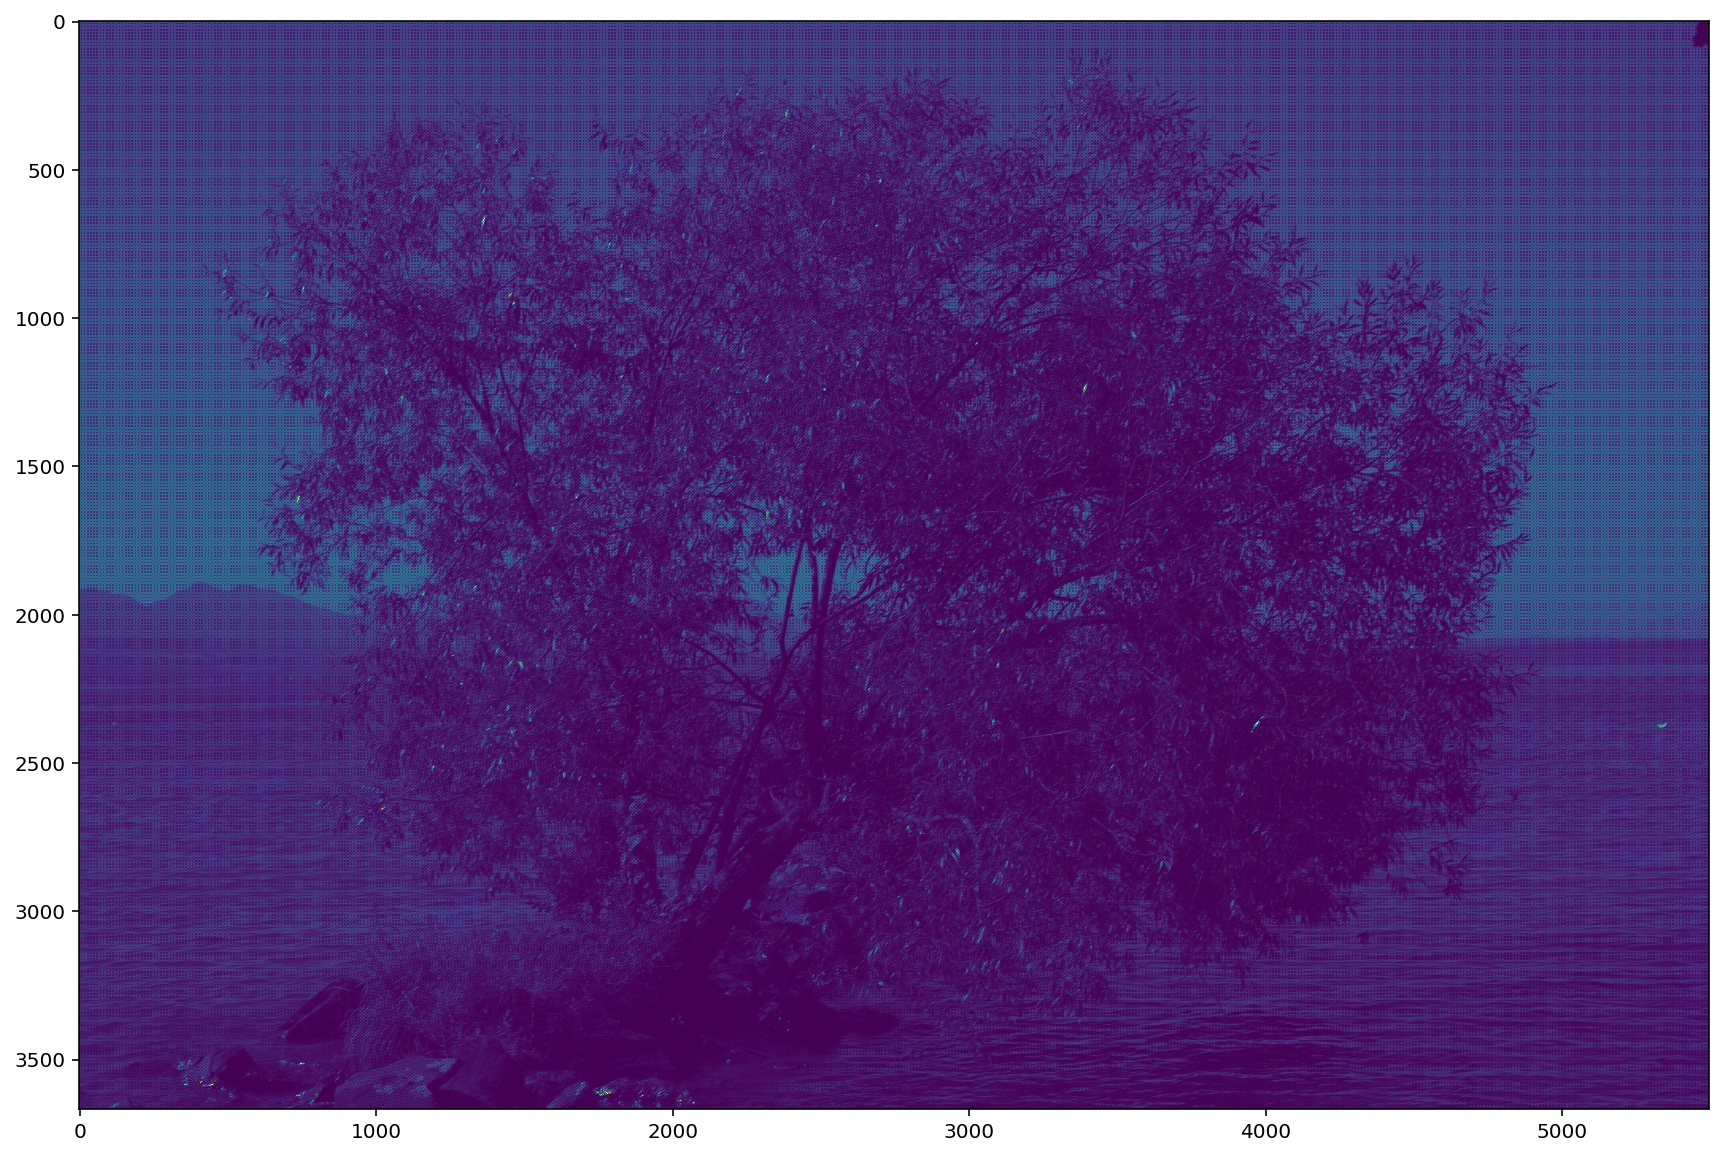

In [37]:
plt.imshow(tree);

The image is just a raw grid of sensor data without explicit color information, hence Matplotlib decided to use a heat color map to visualize the array contents. Purple, blue, green, and yellow colors correspond to pixel values of increasing magnitude. A strange grid-like artifact should be apparent when inspecting the image more carefully.

**TODO** Do the following to zoom into a smaller part of the image: plot the image region between rows ``1000...1100`` and columns ``1000...1100`` (hint: use NumPy array slicing). Make use of the color map (``cmap``) parameter of ``imshow`` to ensure that Matplotlib visualizes the image data using a grayscale (``gray``) color map.

In [38]:
## TODO...

Very strange.. what is going on here? The pattern you see turns out to be related to the design of the sensor that was discussed earlier. Because it's impossible for a single pixel to distinguish among different colors, the sensor consists of a regular arrangement of pixels that are sensitive to red, green, and blue. This is known as a *Bayer grid*. Note that the sensor contains twice as many green pixels as red or blue pixels; the reason for this  physiology: the eyes of humans are more sensitive to green wavelengths of light, hence it makes sense to capture the associated color information at a higher resolution.

<img width="800" src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/21/bayergrid_1.png">

Unfortunately, this kind of representation is not particularly useful: to be able to print or display images, we'll generally want to have information about *all* colors at *every* pixel. The process of taking the partial information from the Bayer grid and converting it into a full color image is known as *demosaicing*. Very high quality demosaicing algorithms exist that do a great job at filling in the missing information, but they can be quite complicated to implement. 

Here, we will implement the most basic version of demosaicing possible: instead of trying to infer the missing pixel values to obtain a full-color image with 5494x3666 pixels, we generate an image at *half* resolution (2747x1833 pixels) by collapsing repeated groups of 4 monochromatic pixels into a single colored pixel. We'll simply ignore one of the green pixels as part of this step for simplicity.

<img width="300" src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/21/bayer-extract.png">

**TODO**: Create a function ``demosaic(image)``, which takes a raw image (a ``5494x3666`` array) as input and performs the operation discussed above, returning a ``2747x1833`` 3-tensor (i.e. a matrix with a third dimension for color with the ordering ``R, G, B``). The easiest way to do this is by extracting the red, green, and blue channels into their own images and then using ``np.dstack`` to create the 3-tensor. The figure above depicts the Bayer grid arrangement used by the Canon 6D camera that took this image. You probably shouldn't need more than 5 lines of code for the demosaicing function.

A general suggestion for this assignment: since we're working with fairly large images, it's important to use vectorized NumPy function—in particular, you should never explicitly need to loop over the pixels of the image.

In [39]:
# TODO

**TODO**: Run the demosaicing function on the ``tree`` image and plot the result.

In [40]:
# TODO

## 2.3 Gamma correction (10 points)

Assuming that you got all the color channels into the right places, the grid-like patterns should disappear and the previous visualization should have resulted in a very dark image of a tree on our beautiful Geneva Lake with a strange blue-green tint. What's going on here?

As discussed before, the color values in the raw image are analogous to the "fill level" of a bucket of water. There is a direct (linear) relationship between how much light a sensor pixel received and the magnitude of the corresponding entry in the raw image.

Somewhat surprisingly, this way of representing image intensity values is not directly suitable for display on a modern computer monitor. Current displays assume a more complex (nonlinear) relationship between pixel values and the brightness that will be produced as a result. In other words: when doubling the value stored in a pixel, the actually visible pixel brightness will not generally double as a result. This nonlinear mapping is known as the *gamma curve* of the display and is defined as
$$
I = V^\gamma
$$
where $I$ is the resulting pixel brightness, $V$ is the pixel's value, and $\gamma$ is a device dependent constant—usually $\gamma\approx 2.2$.
To be able to display a raw image properly, we'll want to go *the other way*, i.e. to find out which pixel value to set so that the display reproduces the brightness that was originally recorded on the sensor.

**TODO**: Define a function ``invgamma(image)`` that takes an arbitrary image of intensities and *inverts* the gamma curve (i.e. it computes $V$ given $I$), returning an array of pixel values of the same size. Implement the function in such a way that negative values are mapped to zero and values greater than ``1.0`` are mapped to ``1.0`` (this will be useful to avoid some potential pitfalls later on). You probably shouldn't need much more than 5 lines of code to do this.

In [41]:
# TODO

**TODO**: Plot the ``tree`` image once more, but this time run it through both the ``demosaic`` *and* the ``invgamma`` function.

In [42]:
# TODO

## 2.4.1 Color space transformations (5 points)

Assuming a correct implementation of the previously discussed components, you should now see an overall brighter image of the tree with natural contrast. However, the colors of the tree still look "weird" (it's the same unnatural blue-green tint we observed before). Why does this happen?

There is an infinite space of possible varieties when building screens or sensors that emit or measure certain colors of light. Any particular RGB screen or camera will need to commit to a specific set of emission colors or sensitivities, which conceptually defines the axes of a 3D color coordinate system that is associated with that device. Unfortunately, this means that the red, green and blue colors perceived by the camera's sensor are generally not the same colors that are produced by the corresponding phosphors or LEDs on your screen. In other words, a color (such as ``[0.0, 0.5, 0.5]``,  which could be a dark blue green) captured by one device will need to be transformed so that it truly reproduces that same color on another device.

<img width="800" src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/21/colorcube.png">

The above discussion greatly simplifies some aspects of color theory, but this description shall be sufficient for our purposes here. The tool we'll use to transform colors is simple: matrix-vector multiplication! The following fragment defines a small helper function that applies a color space transformation to every pixel in an image.

In [43]:
def apply_colormatrix(image, matrix):
    """
    ``image`` is assumed to be an RGB image represented
    as a NumPy array with shape [width, height, 3]. 
    
    ``matrix`` is a 3x3 color transformation matrix
    that will be applied to the color values of each pixel
    """
    return image @ matrix.T

**TODO**: Let's try using it! Define a $3\times 3$ matrix that swaps the blue and red color channel (what should this matrix look like?). Use it to transform the colors of the ``tree`` image and visualize the result.

Note that you need to be careful when applying color transformation matrices: the sequence is always

1. Demosaic
2. Color transformation
3. Gamma correction

In particular, be careful not to swap steps 2 and 3. It doesn't make sense to transform a (nonlinear) gamma representation of colors using (linear) matrix-vector multiplication.

In [44]:
# TODO

## 2.4.2 Color checkers

Without any additional knowledge, it's unclear what transformation should be applied to ensure correct color reproduction. In the context of photography, the way that this problem is generally solved is by taking a picture of a color checker, which looks something like this:
<img src="//rgl.s3.eu-central-1.amazonaws.com/media/uploads/wjakob/2016/10/21/mini_colorchecker_surface.jpg">

A color checker is a standardized piece of cardboard, usually with 24 squares of different colors. The patch colors are specially chosen to represent a range of colors found on man-made and natural materials such as human skin or plants.

We define the following helper function, which plots a given set of color checker values in a 6x4 grid similar to the above image.

In [45]:
def plot_colorchecker(patch_data, title = ''):
    plt.figure(figsize=(6.0, 4.0))
    plt.suptitle(title)
    for i in range(4):
        for j in range(6):
            plt.subplot(4, 6, i*6+j+1)
            plt.imshow(invgamma(patch_data[np.newaxis, np.newaxis, i*6+j, :]))
            plt.axis('off')

Importantly, the red, green, and blue pixel intensities that are needed to reproduce the color checker colors on modern computer screens are *known* constants. They are stored in the mysterious ``patch_data`` array we loaded earlier. Thus, we should be able to plug them into the ``plot_colorchecker`` function to generate an image that resembles the above photograph:

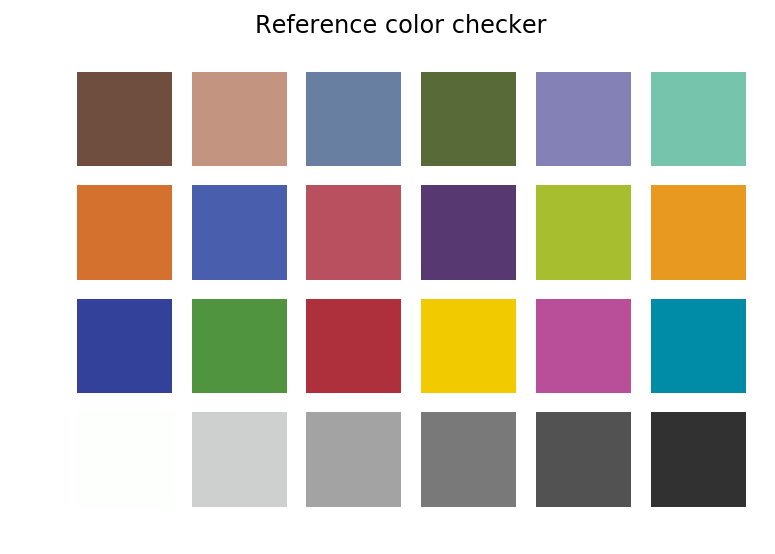

In [46]:
plot_colorchecker(patches_target, title='Reference color checker');

## 2.4.3 Obtaining and visualizing all required information (15 points)

When I took the photograph of the tree on Geneva Lake, I also made a second photograph of a color checker, which is stored in the ``whitebal`` array.

**TODO**: Use the functions defined earlier to visualize a demosaiced & gamma-corrected portion of rows ``680..1150`` and columns ``1020:1730`` of the ``whitebal`` image.

In [47]:
# TODO

To continue, we'll need to have a way of of extracting the captured colors of the individual patches in the ``whitebal`` image. The following function might be useful:

In [48]:
def extract_patch(image, i, j):
    """
    Extracts the central portion of the color patch ``(i, j)`` from ``image``
    
    ``image`` is assumed to be a demosaiced linear (i.e. *not* gamma-corrected)
    version of the color checker image
 
    ``i`` denotes the row of the color checker (from 0 to 3)

    ``j`` denotes the column of the color checker (from 0 to 5)
    """

    start = np.array([i,   j  ]) * 113 + np.array([690, 1040]) + np.array([30, 30])
    end   = np.array([i+1, j+1]) * 113 + np.array([690, 1040]) - np.array([30, 30])

    return image[start[0]:end[0], start[1]:end[1], :]

**TODO**: Write a piece of code, which extracts all 24 patch colors from the ``whitebal`` image and converts it into the same format as the reference colors stored in ``patches_target`` (i.e. a $24\times 3$ matrix). Store the resulting information in an array named ``patches_camera``.

In [ ]:
# TODO

**TODO**: Apply the ``plot_colorchecker`` function to the ``patches_camera`` array generated above. The result should match the photograph from earlier (i.e. a weird color checker with a blue-green tint). Be careful that your extraction code does not change the ordering of patches (that much should be visible even with the distorted colors)

In [ ]:
# TODO

## 2.4.4 Determining the correct color space transformation (40 points)

Now begins the truly interesting part: we need to find a color space transformation that will allow us to convert red/green/blue values on the sensor to meaningful red/green/blue values on a modern display. We've previously taken an image of a color checker and thus know the value of each patch in the camera's RGB coordinate system (stored in ``patches_camera``). We also know, what value it *should* theoretically have in the display RGB coordinate system (``patches_target``).

A suitable color space transformation $f$ should thus satisfy a set of equations of the form
$$
f(\mathbf{c}_{\mathrm{camera}, i}) = \mathbf{c}_{\mathrm{target}, i} \qquad (i=1, \dots, 24),
$$
where ``f`` applies a color-space transformation using a matrix-vector multiplication
$$
f(\mathbf{c}) = \mathbf{F}\mathbf{c}.
$$

Here, $\mathbf{F}$ is a $3\times 3$ matrix, i.e. there are 9 unknowns. On the other hand, we have observed the RGB values of 24 different color patches, which means that there were 72 observations. Since there are more observations than unknowns, the problem does not have a solution in the traditional sense. However, perhaps we can find a solution such that
$$
f(\mathbf{c}_{\mathrm{camera}, i}) \approx \mathbf{c}_{\mathrm{target}, i} \qquad (i=1, \dots, 24).
$$

This is a least squares problem!

In the following we want to convert the above set of equations into a concrete least squares system of the form $\mA\vx = \vb$ that we can then solve.

1. **TODO**: In this task the the matrix $\mathbf{F}$ above is the unkown, which is a bit unusual. So instead, we reinterpret this $3\times 3$ matrix as a $9\times 1$ column vector $\vx$. This however also forces us to re-arrange the rest of the problem somewhat.
Write code that builds corresponding matrix $\mA$ and right-hand-side vector $\vb$.<br>
This is the hardest part of this problem. You'll want to carefully think about how to solve the problem on pencil and paper first before implementing it in Python. A few good topics to think about: where should the camera color observations go? Where do the target pixel values go? What dimensions should the system have? What kind of structure does the system matrix have? (A hint: it's not a full matrix -- some elements will be filled with zeros.). Note that you must describe *why* your solution solves the problem: working code without an explanation will receive no points.<br><br>

2. **TODO**: Solve the above system using any of the methods discussed in class. Note that you will need to invert the transformation from matrix $\mathbf{F}$ to vector $\vx$ above to get the final color-space transformation.

**Hints**:<br>
1. There are a two functions that could be helpful: ``np.ravel()`` rearranges the contents of a matrix into a tall column vector. ``np.reshape()`` goes the other way and permits rearranging a vector back into a matrix. 

2. A particularly short implementation (1 line) to construct $\mA$ is possible using the functions ``np.eye(N)`` (which returns an $N\times N$ identity matrix) and ``np.kron()`` which computes a [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) -- a fancy name of the operation, which inserts scaled version of a matrix into another matrix. It's also perfectly fine to write a loop here, which just initializes the matrix elements individually.

In [ ]:
# TODO

**TODO**: Apply your computed color space transformation to the color values in ``patches_camera`` and visualize the result using the ``plot_colorchecker`` function. The result should look virtually identical to the reference colors.

In [ ]:
plot_colorchecker(patches_camera, title = 'Before color transformation')
plot_colorchecker(apply_colormatrix(patches_camera, x), title = 'After color transformation')

**TODO**: Finally!! Now, apply the color space transformation to the ``tree`` image and plot the result.

You have learned how digital photographs are developed and implemented an end-to-end pipeline that solves a least squares problem to obtain calibrated colors. Congratulations! :)

In [ ]:
# TODO